# HEAD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
T = np.arange(0,1,0.01)

loadfiles = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\20210331\\Analyzed_data\\fitNGD2LSpara.npz', allow_pickle=True)
for k in loadfiles.files:
    vars()[k] = loadfiles[k][()]
Ppara_dict = dict.fromkeys(para_dict.keys())
Npara_dict = dict.fromkeys(para_dict.keys())
for k in para_dict.keys():
    Ppara_dict[k] = para_dict[k][pcn]
    Npara_dict[k] = para_dict[k][ncn]

for date in ['0413', '0420', '0504','0506']:
    loadfiles = np.load('D:\\GoogleDrive\\retina\\Chou\'s data\\2021'+date+'\\Analyzed_data\\fitNGD2LSpara.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()['new_'+k] = loadfiles[k][()]
    for k in para_dict.keys():
        Ppara_dict[k] = np.append(Ppara_dict[k], new_para_dict[k][new_pcn])
        Npara_dict[k] = np.append(Npara_dict[k], new_para_dict[k][new_ncn])

NPD = pd.DataFrame(Npara_dict)
PPD = pd.DataFrame(Ppara_dict)

para_dict = Ppara_dict

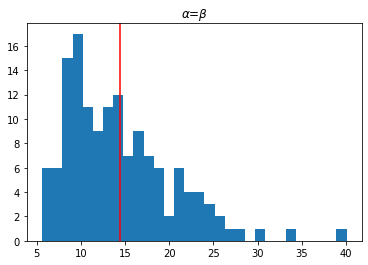

In [3]:
data = para_dict['alpha']
plt.title(r'$\alpha$=$\beta$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

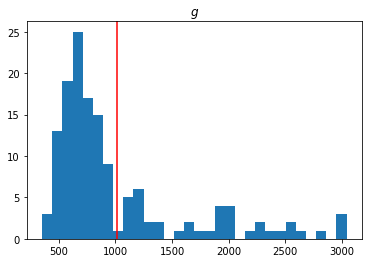

In [4]:
data = para_dict['g']
plt.title(r'$g$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

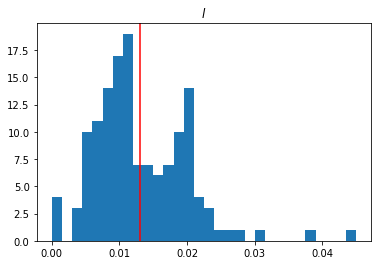

In [5]:
data = para_dict['l']
plt.title(r'$l"$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

0.02822107296834977

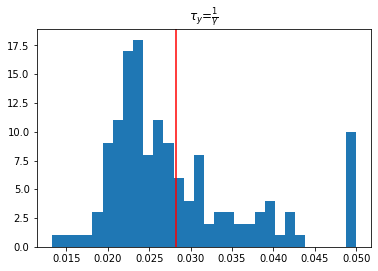

In [6]:
data = para_dict['tau_y']
plt.title(r'$\tau_y$=$\frac{1}{\gamma}$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')
np.mean(data)

38.202215933582856

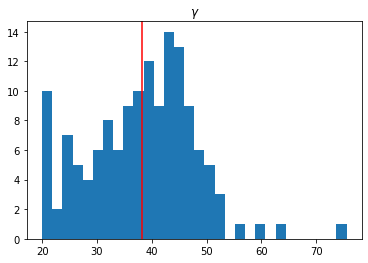

In [21]:
data = 1/para_dict['tau_y']
plt.title(r'$\gamma$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')
np.mean(data)

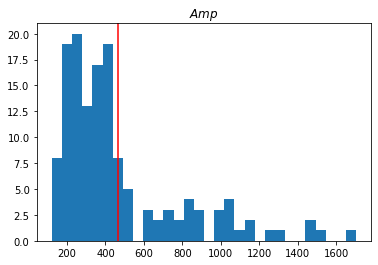

In [7]:
data = para_dict['Amp']
plt.title(r'$Amp$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

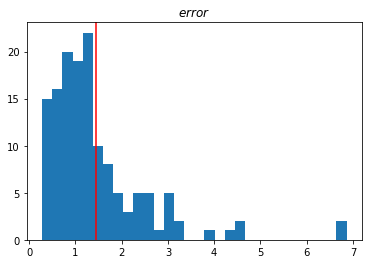

In [8]:
data = para_dict['error']
plt.title(r'$error$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')

Text(0, 0.5, '$g$')

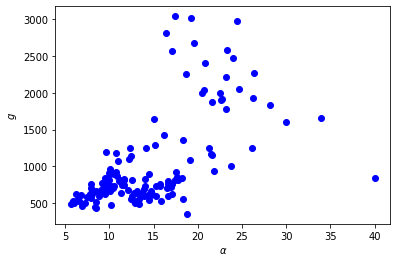

In [9]:
plt.scatter(para_dict['alpha'], para_dict['g'], c ='b')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$g$')

Text(0, 0.5, '$g$')

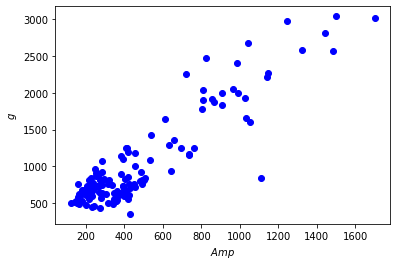

In [10]:
plt.scatter(para_dict['Amp'], para_dict['g'], c ='b')
plt.xlabel(r'$Amp$')
plt.ylabel(r'$g$')

Text(0, 0.5, '$\\alpha$')

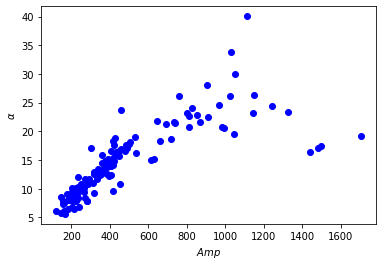

In [11]:
plt.scatter(para_dict['Amp'], para_dict['alpha'], c ='b')
plt.xlabel(r'$Amp$')
plt.ylabel(r'$\alpha$')

# def ll(x, a, b): return x*a+b
# popt, _ = curve_fit(ll, para_dict['Amp'], para_dict['alpha'])

# lims = [0, np.max(para_dict['Amp'])]
# plt.plot(lims, ll(np.array(lims), *popt), 'k-', alpha=0.75, zorder=0)

0.03548668384203249

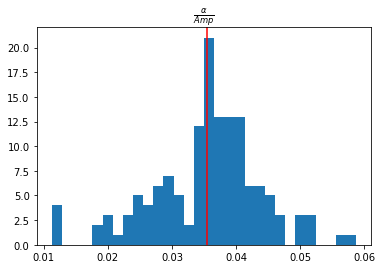

In [13]:
data = para_dict['alpha']/para_dict['Amp']
plt.title(r'$\frac{\alpha}{Amp}$')
plt.hist(data,30)
plt.axvline(np.mean(data), color = 'r')
np.mean(data)

# filter by ...

In [14]:
Index2 = np.where(para_dict['tau_y']<0.045)
Index = Index2

# Index = np.intersect1d(Index1, Index2, Index3)

Text(0, 0.5, '$g$')

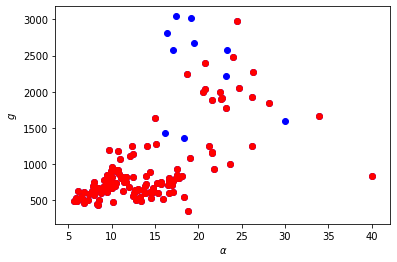

In [15]:
plt.scatter(para_dict['alpha'], para_dict['g'], c ='b')
plt.scatter(para_dict['alpha'][Index], para_dict['g'][Index], c ='r')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$g$')

Text(0, 0.5, '$g$')

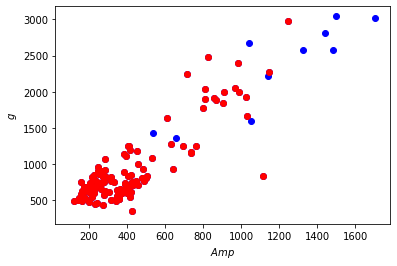

In [16]:
plt.scatter(para_dict['Amp'], para_dict['g'], c ='b')
plt.scatter(para_dict['Amp'][Index], para_dict['g'][Index], c ='r')
plt.xlabel(r'$Amp$')
plt.ylabel(r'$g$')

Text(0, 0.5, '$\\alpha$')

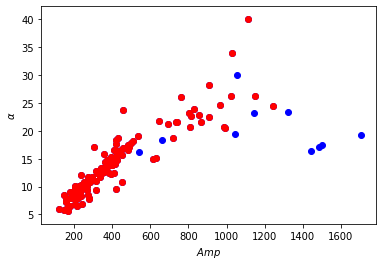

In [17]:
plt.scatter(para_dict['Amp'], para_dict['alpha'], c ='b')
plt.scatter(para_dict['Amp'][Index], para_dict['alpha'][Index], c ='r')
plt.xlabel(r'$Amp$')
plt.ylabel(r'$\alpha$')

# def ll(x, a, b): return x*a+b
# popt, _ = curve_fit(ll, para_dict['Amp'], para_dict['alpha'])

# lims = [0, np.max(para_dict['Amp'])]
# plt.plot(lims, ll(np.array(lims), *popt), 'k-', alpha=0.75, zorder=0)

# plot TK 

In [18]:
def plotNGD2L_TK(T, alpha, beta, gamma, g, h, l, tau_y, Amp):
    dt = np.mean(np.diff(T))
    dt = 0.1*dt
    T = np.arange(0, T[-1]+dt, dt)
    x = T/tau_y /tau_y *np.exp(-T/tau_y)*dt
    
    y=np.zeros_like(x)
    z=np.zeros_like(x)
    w=np.zeros_like(x)
    for j in range(len(x)-1):
        dy=dt*(-alpha*y[j] + x[j]-z[j] )
        dz=dt*(-beta*z[j]  + g*y[j] )
        dw=dt*(-gamma*w[j] + h*y[j]-l*z[j] )
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
        w[j+1]=w[j]+dw

    nTK = w[::10]/(dt) #normalized by integration
    return -Amp*nTK

In [19]:
for I in Index:
    plotNGD2L_TK(T, *PPD.loc[I][:-1])

TypeError: plotNGD2L_TK() missing 2 required positional arguments: 'tau_y' and 'Amp'